In [1]:
import numpy as np 
import pandas as pd

In [2]:
# Specify the path to your CSV file within the directory
csv_file_path = '/Users/kavyavempati/Desktop/Projects/Electric_Vehicle_Population_Data.csv'

# Read the CSV file into a DataFrame
EV = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(EV.head())

   VIN (1-10)    County               City State  Postal Code  Model Year  \
0  2C4RC1N71H    Kitsap          Bremerton    WA      98311.0        2017   
1  2C4RC1N7XL   Stevens           Colville    WA      99114.0        2020   
2  KNDC3DLCXN    Yakima             Yakima    WA      98908.0        2022   
3  5YJ3E1EA0J    Kitsap  Bainbridge Island    WA      98110.0        2018   
4  1N4AZ1CP7J  Thurston           Tumwater    WA      98501.0        2018   

       Make     Model                   Electric Vehicle Type  \
0  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       KIA       EV6          Battery Electric Vehicle (BEV)   
3     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4    NISSAN      LEAF          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              33   
1 

In [3]:
print("Shape of EV DataFrame:", EV.shape)

Shape of EV DataFrame: (159467, 17)


In [4]:
column_names = EV.columns
print("Column names of EV DataFrame:", column_names)

Column names of EV DataFrame: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [15]:
#dataset info
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [16]:
#checking for null values
EV.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [21]:
#counties and cities in Washington State have the highest electric vehicle registrations?
county_city_registrations = EV.groupby(['County', 'City']).size().reset_index(name='Registrations')
highest_registrations = county_city_registrations.sort_values(by='Registrations', ascending=False)
highest_registrations.head(2)

,County,City,Registrations
272,King,Seattle,26932
239,King,Bellevue,8075


In [20]:
##Popular MODEL
make_model_distribution = EV.groupby(['Make', 'Model']).size().reset_index(name='Registrations')
popular_make_model = make_model_distribution.sort_values(by='Registrations', ascending=False)
popular_make_model.head(2)

,Make,Model,Registrations
111,TESLA,MODEL Y,30841
108,TESLA,MODEL 3,28589


In [5]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


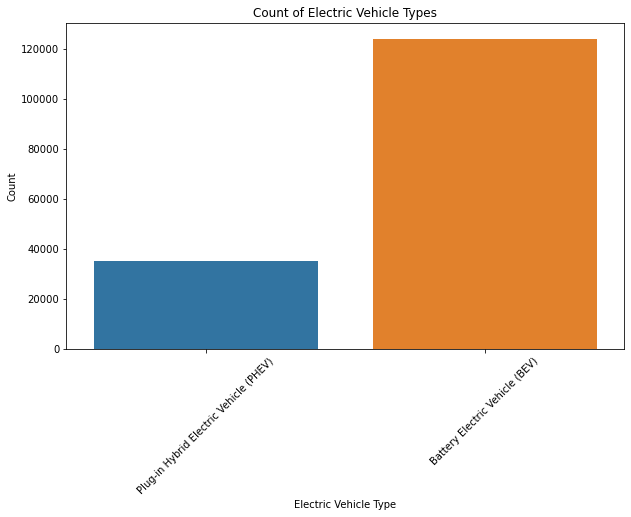

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each Electric Vehicle Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=EV)
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

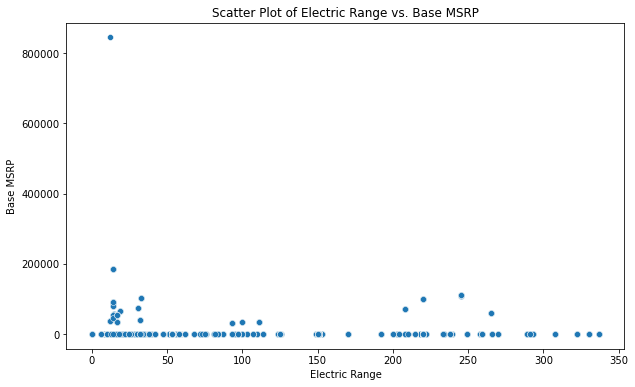

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=EV)
plt.title('Scatter Plot of Electric Range vs. Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

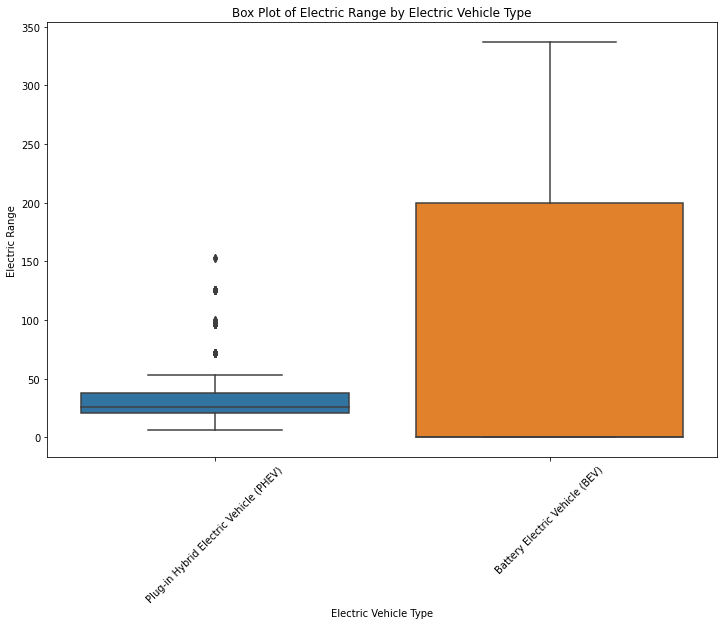

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=EV)
plt.title('Box Plot of Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

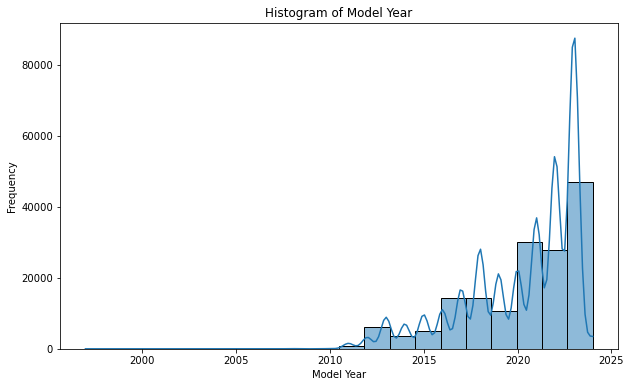

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(EV['Model Year'], bins=20, kde=True)
plt.title('Histogram of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

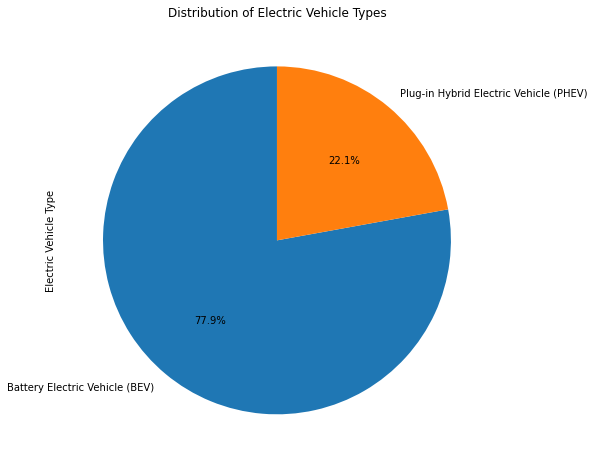

In [10]:
plt.figure(figsize=(8, 8))
EV['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

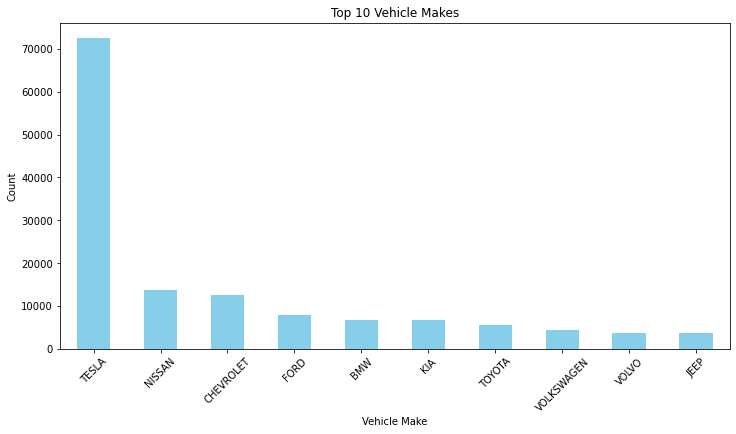

In [11]:
plt.figure(figsize=(12, 6))
top_makes = EV['Make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

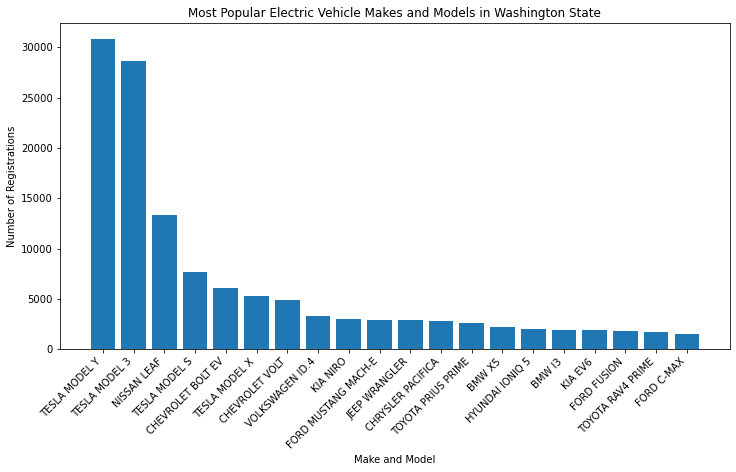

In [22]:
x=popular_make_model.head(20)
plt.figure(figsize=(12, 6))
plt.bar(x['Make'] + ' ' + x['Model'], x['Registrations'])
plt.xlabel('Make and Model')
plt.ylabel('Number of Registrations')
plt.title('Most Popular Electric Vehicle Makes and Models in Washington State')
plt.xticks(rotation=45, ha='right')
plt.show()

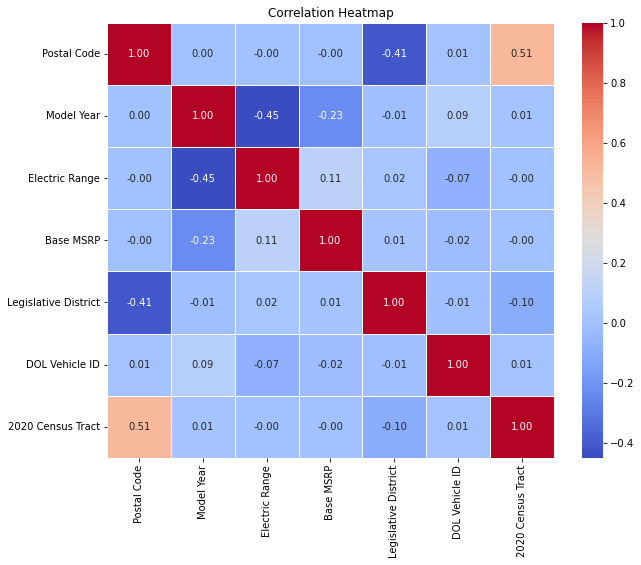

In [12]:
numeric_columns = EV.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = EV[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

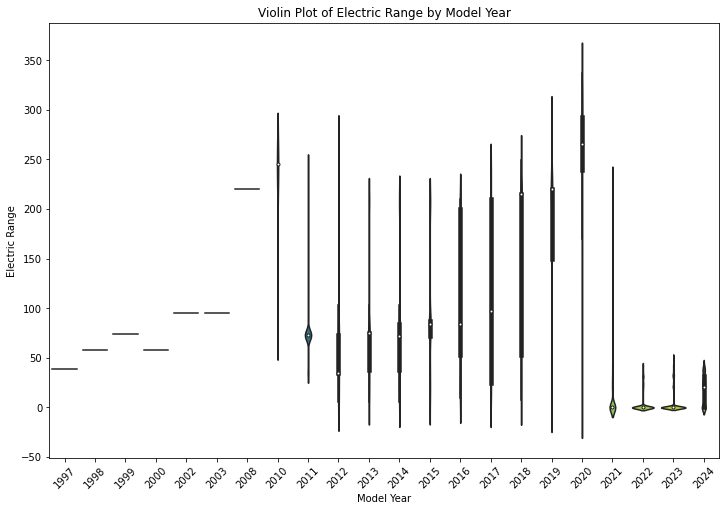

In [13]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Model Year', y='Electric Range', data=EV, palette='viridis')
plt.title('Violin Plot of Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()